In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import lightkurve as lk
from matplotlib.collections import LineCollection
from tqdm import tqdm_notebook

import glob, os

from astropy.table import Table
plt.rcParams['font.size'] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib.colors import LinearSegmentedColormap
from pylab import *

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula = LinearSegmentedColormap.from_list('parula', cm_data)

parula_colors = []
cmap = cm.get_cmap(parula, 2)
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    parula_colors.append(matplotlib.colors.rgb2hex(rgb))
parula_colors = np.array(parula_colors)

In [4]:
data_all = lk.search_lightcurvefile('CR Dra').download_all()

//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


In [5]:
tics, time, flux, errs, sects = [] ,[] ,[], [], []

for data in data_all:
    d = data.PDCSAP_FLUX.remove_nans().normalize()
    time.append(d.time)
    flux.append(d.flux)
    errs.append(d.flux_err)
    tics.append(d.targetid)
    sects.append(d.sector)

## import stella

In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/Users/arcticfox/Documents/GitHub/stella/')
import stella

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Rotation Period

In [7]:
mProt = stella.MeasureProt(IDs=tics,
                           time=time,
                           flux=flux,
                           flux_err=errs)

In [8]:
mProt.run_LS()

Finding most likely periods: 100%|██████████| 3/3 [00:00<00:00, 28.64it/s]


In [9]:
period = mProt.LS_results['avg_period_days'].data[0] + 0.0

### Neural network predictions

In [10]:
model_dir = '/Users/arcticfox/Documents/flares/run01/'
models = os.listdir(model_dir)
models = np.sort([os.path.join(model_dir, i) for i in models if i.endswith('.h5')])

In [11]:
cnn = stella.ConvNN(output_dir='/Users/arcticfox/Documents/GitHub')

Can only use stella.ConvNN.predict().


In [12]:
preds = []

for model in models:
    cnn.predict(modelname=model,
                times=time,
                fluxes=flux,
                errs=errs)
    preds.append(cnn.predictions)
preds = np.array(preds)

100%|██████████| 3/3 [00:01<00:00,  1.48it/s]


In [13]:
avg_preds = np.copy(time)

for i in range(len(time)):
    temp = np.zeros((len(models), len(time[i])))
    for j in range(len(models)):
        temp[j] = preds[j][i]
    ap = np.nanmedian(temp, axis=0)
    avg_preds[i] = ap

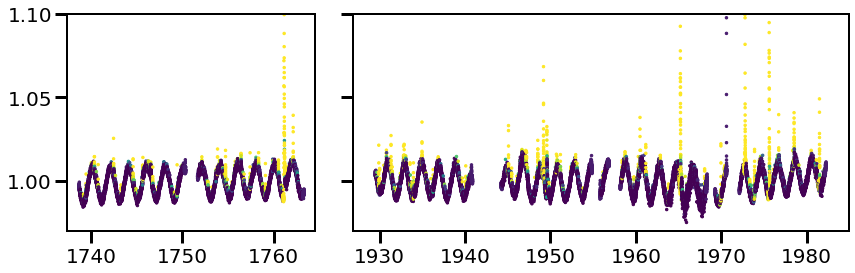

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4),
                               sharey=True, gridspec_kw={'width_ratios':[1,2]})
for i in range(len(time)):
    if i == 0:
        ax1.scatter(time[i], flux[i], c=avg_preds[i],
                    vmin=0, vmax=1, s=6)
    else:
        ax2.scatter(time[i], flux[i], c=avg_preds[i],
                    vmin=0, vmax=1, s=6)
plt.ylim(0.97,1.1)
plt.subplots_adjust(wspace=0.1)

### Marking the flares

In [15]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/Users/arcticfox/Documents/GitHub/stella/')
import stella

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
ff = stella.FitFlares(id=tics,
                      time=time,
                      flux=flux,
                      predictions=avg_preds,
                      flux_err=errs)

In [17]:
ff.identify_flare_peaks(threshold=0.6)

Finding & Fitting Flares: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


In [18]:
ff.flare_table#[ff.flare_table['tpeak']<1753]

Target_ID,tpeak,amp,ed_s,rise,fall,prob
float64,float64,float64,float64,float64,float64,float64
207436278.0,1738.8818175252102,1.0024964901399986,1.1725440214285914,0.0001,0.004935359661101644,0.661168247461319
207436278.0,1739.1831999872354,1.0048625700541671,1.4633221042250975,0.0001,0.0028132922512332757,0.9666355848312378
207436278.0,1739.4581942233606,1.0120399197151067,5.914480781131667,0.0001,0.005310584483011438,0.9999858736991882
207436278.0,1740.040126768865,1.003594951475219,2.8707951455891614,0.0001,0.009345741435186159,0.9758083820343018
207436278.0,1740.3678980090665,1.0084383416482194,5.226857876970933,0.0001,0.0062939387572999396,0.9999912977218628
207436278.0,1740.7790010744168,1.0148871059070017,3.2239099963476177,0.0001,0.0017470916562178885,0.9999082088470459
207436278.0,1742.4636919210923,1.0201185621084348,4.551095858757295,0.0001,0.0018782477078478767,0.9999988675117493
207436278.0,1742.673410403487,1.0059762636004497,2.2228989323012573,0.0001,0.0040904906660977815,0.922773003578186
207436278.0,1743.2706221654328,1.007947714219776,2.7159601795791675,0.0001,0.003136638693227501,0.9998277723789215


In [19]:
%matplotlib inline

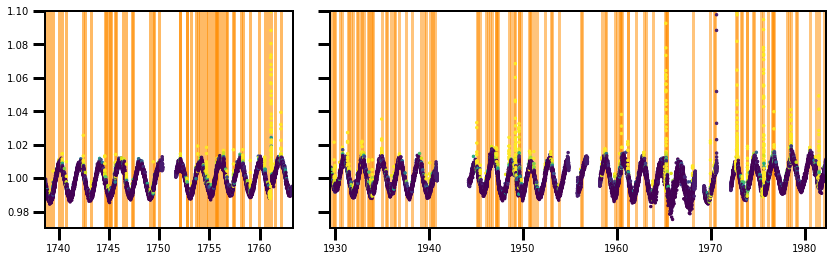

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4),
                               sharey=True, gridspec_kw={'width_ratios':[1,2]})
totaltime = 0
for i in range(len(time)):
    if i == 0:
        ax1.scatter(time[i], flux[i], c=avg_preds[i],
                    vmin=0, vmax=1, s=6)
        for tpeak in ff.flare_table['tpeak']:
            ax1.vlines(tpeak, 0, 2, color='darkorange', alpha=0.6,
                       linewidth=3, zorder=0)
    else:
        ax2.scatter(time[i], flux[i], c=avg_preds[i],
                    vmin=0, vmax=1, s=6)
        for tpeak in ff.flare_table['tpeak']:
            ax2.vlines(tpeak, 0, 2, color='darkorange', alpha=0.3,
                       linewidth=3, zorder=0)
    totaltime += (len(time[i])*2)
        
plt.ylim(0.97,1.1)
ax1.set_xlim(time[0].min(), time[0].max())
ax2.set_xlim(time[1].min(), time[2].max())
plt.subplots_adjust(wspace=0.1)

totaltime = (totaltime*u.minute).to(u.day)

(0.98, 1.08)

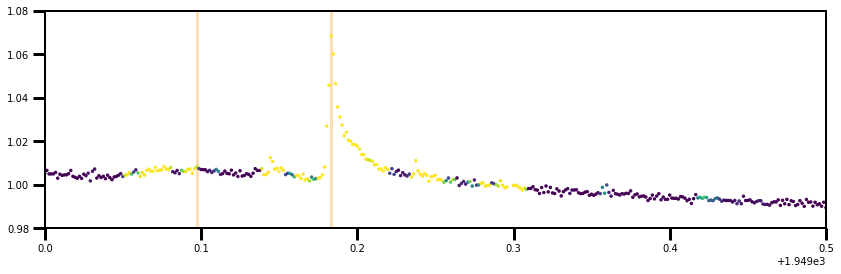

In [22]:
plt.figure(figsize=(14,4))
plt.scatter(time[1], flux[1], c=avg_preds[1],
                    vmin=0, vmax=1, s=6)
for tpeak in ff.flare_table['tpeak']:
    if (tpeak>= 1948) and (tpeak<=1950):
        plt.vlines(tpeak, 0, 2, color='darkorange', alpha=0.3,
                       linewidth=3, zorder=0)
plt.xlim(1949, 1949.5)
plt.ylim(0.98,1.08)

In [23]:
##1929, 1932

In [24]:
len(ff.flare_table)/totaltime

<Quantity 2.48348086 1 / d>

In [25]:
mProt.LS_results

Target_ID,period_days,secondary_period_days,gauss_width,max_power,secondary_max_power,orbit_flag,oflag1,oflag2,Flags,avg_period_days
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
207436278,1.9809093843840886,1.969962349124985,0.1234383739663826,0.9538639402658438,0.15471888582482507,0.0,0.0,0.0,0,1.9844314854254967
207436278,1.9832173820934789,1.98360426596104,0.12973883806808853,0.8640444372529318,0.16451587761077396,0.0,0.0,0.0,0,1.9844314854254967
207436278,1.9891676897989226,1.9735452913922278,0.127132700088069,0.7345535202344566,0.17951243963292565,0.0,0.0,0.0,0,1.9844314854254967


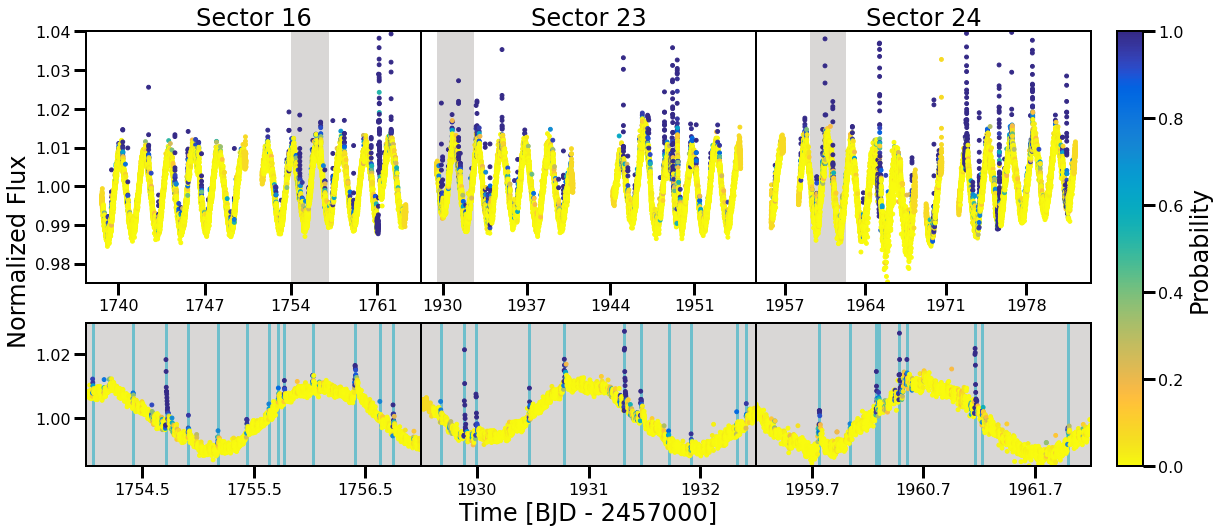

In [67]:
%matplotlib inline
plt.rcParams['font.size']=16

bkg_color = '#d9d7d6'

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(18,8),
                                                  gridspec_kw={'height_ratios':[1.75,1]})
totaltime = 0

axes = [[ax1,ax4], [ax2,ax5], [ax3,ax6]]
lims = [[1754,1757], [1929.5, 1932.5], [1959.2,1962.2]]

for i in range(len(axes)):
    axes[i][0].scatter(time[i], flux[i], c=avg_preds[i],
                    vmin=0., vmax=1, s=15, cmap=parula.reversed())
    
    axes[i][0].axvspan(lims[i][0], lims[i][1],  
                       color=bkg_color, zorder=0)
    
    q = ((time[i] >= lims[i][0]) & (time[i] <= lims[i][1]))
    im = axes[i][1].scatter(time[i][q], flux[i][q], c=avg_preds[i][q],
                            vmin=0., vmax=1, s=15, cmap=parula.reversed())
    axes[i][1].set_facecolor(bkg_color)
    
    subset = ff.flare_table[(ff.flare_table['tpeak']>=lims[i][0])&
                            (ff.flare_table['tpeak']<=lims[i][1])]
    for tpeak in subset['tpeak']:
        axes[i][1].vlines(tpeak, 0, 2, color=parula_colors[100], 
                          alpha=0.5,
                          linewidth=3, zorder=0)
    
    totaltime += (len(time[i])*2)
    
    axes[i][0].set_title('Sector {}'.format(sects[i]), fontsize=24)
    
    axes[i][0].set_ylim(0.975,1.04)
    axes[i][1].set_ylim(0.985,1.03)
    
    axes[i][1].set_xlim(lims[i])
    
    axes[i][1].set_xticks(np.arange(lims[i][0]+0.5, lims[i][1],1))
    axes[i][0].set_xticks(np.round(np.arange(time[i][0]+1, time[i][-1],7),0))

    if i > 0:
        axes[i][0].set_yticks([])
        axes[i][1].set_yticks([])
    if i == 1:
        axes[i][1].set_xlabel('Time [BJD - 2457000]', fontsize=24)
    if i == 0:
        axes[i][1].set_ylabel('Normalized Flux', y=1.5, fontsize=24)
    
    axes[i][0].set_rasterized(True)
    axes[i][1].set_rasterized(True)


fig.subplots_adjust(right=0.9, wspace=0, hspace=0.2)
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Probability', fontsize=24)
plt.savefig('/Users/arcticfox/Desktop/crdra_stella.pdf',
            dpi=200, rasterized=True, bbox_inches='tight')

totaltime = (totaltime*u.minute).to(u.day)

In [ ]:
np.max(ff.flare_table['amp'])

In [ ]:
np.nansum(ff.flare_table['prob'])/totaltime

In [42]:
ff.flare_table.sort('amp')

In [43]:
ff.flare_table

Target_ID,tpeak,amp,ed_s,rise,fall,prob
float64,float64,float64,float64,float64,float64,float64
207436278.0,1949.0970832792466,1.0021349770666486,0.9174543722909138,0.0001,0.004461123324866307,0.9054456949234009
207436278.0,1935.5747495276128,1.0023187935023874,1.5030454114211294,0.0001,0.0057833040149436145,0.8858456015586853
207436278.0,1738.8818175252102,1.0024964901399986,1.1725440214285914,0.0001,0.004935359661101644,0.661168247461319
207436278.0,1951.534596910084,1.0027775658306257,1.1931723996871442,0.0001,0.004186340340848237,0.6237464249134064
207436278.0,1754.4190695635548,1.0028046811679692,1.150824984649184,0.0001,0.0037116403437026267,0.8467330932617188
207436278.0,1963.0485078517197,1.0028290480422675,2.4663219422077156,0.0001,0.00901050466832597,0.6837075352668762
207436278.0,1961.2290649042036,1.0028485247785017,3.051827861996739,0.0001,0.01,0.9526752233505249
207436278.0,1956.2471248577335,1.00299494971131,1.2085631919161859,0.0001,0.003672497152836097,0.7826992571353912
207436278.0,1749.963579515718,1.0030906718678863,1.738302999640016,0.0001,0.00710020026097739,0.8390346169471741


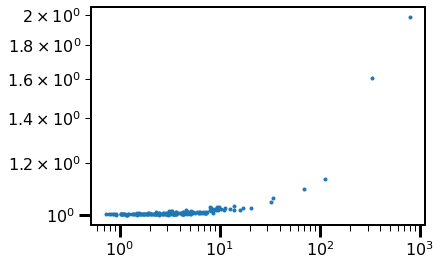

In [102]:
plt.plot(ff.flare_table['ed_s'], ff.flare_table['amp'], '.')
plt.xscale('log')
plt.yscale('log')

## Brightest flares

In [44]:
alltime, allflux, allpred = np.array([]), np.array([]), np.array([])

for i in range(len(time)):
    alltime = np.append(alltime, time[i])
    allflux = np.append(allflux, flux[i])
    allpred = np.append(allpred, avg_preds[i])

In [116]:
from astroquery.mast import Catalogs
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord

In [120]:
coords = SkyCoord(data_all[0].ra, data_all[0].dec, unit=(u.deg))
j = Gaia.query_object_async(coords, radius=u.Quantity(0.01, u.deg))

In [124]:
lum = (j['lum_val'][0]*u.Lsun).to(u.erg/u.s)

69.12125809412314 s 3.2056600005759884e+34 erg
112.37005875033515 s 5.2114242785889055e+34 erg
331.93348267851934 s 1.5394191564416587e+35 erg
800.3339512264162 s 3.7117358758948715e+35 erg


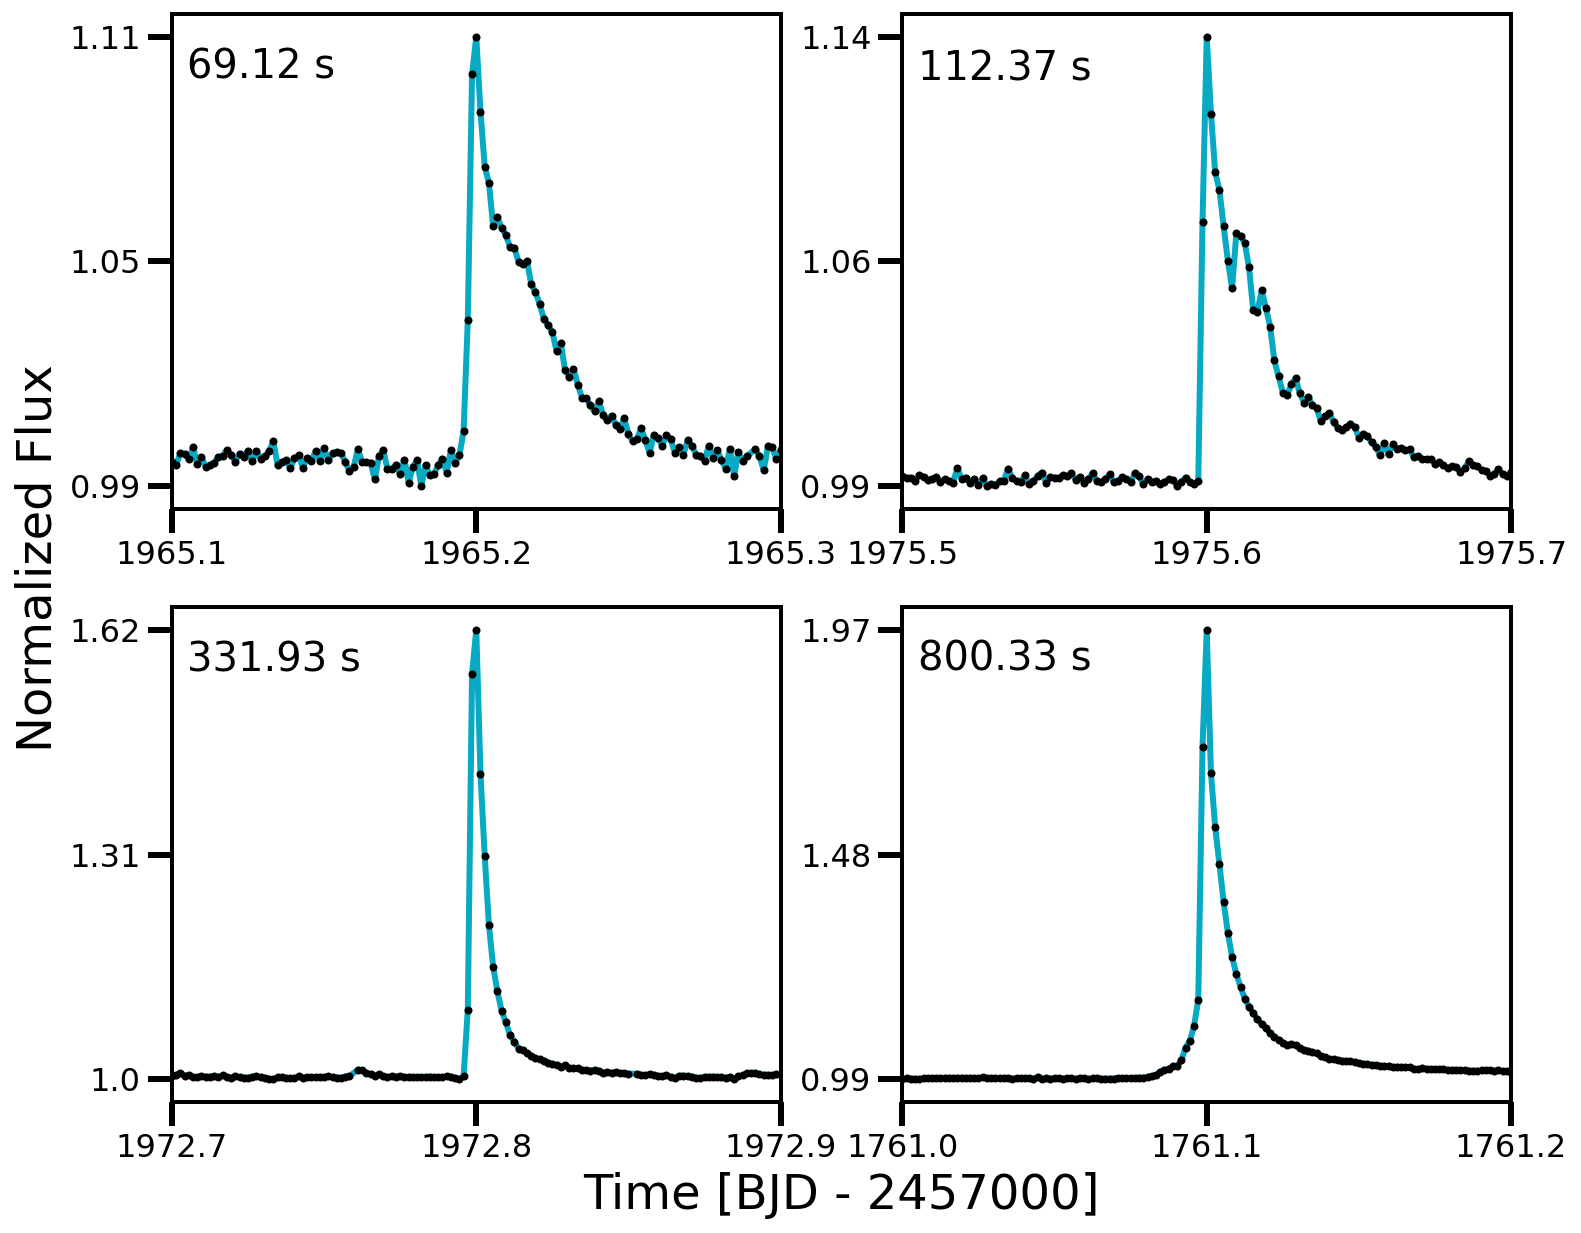

In [161]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(12,10))

i = -4
where = [0.99, 0.987, 0.965, 0.955]

for ax in axes.reshape(-1):
    tpeak = ff.flare_table['tpeak'].data[i]
    mask = ((alltime > tpeak-0.1) & (alltime < tpeak+0.1))
    ax.plot(alltime[mask], allflux[mask], c=parula_colors[100],
               linewidth=3)
    ax.plot(alltime[mask], allflux[mask], 'k.')
    
    xticks = np.arange(tpeak-0.1, tpeak+0.2, 0.1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(np.round(i,1)) for i in xticks])
    ax.set_xlim(xticks[0], xticks[-1])
    
    yticks = np.linspace(allflux[mask].min(), allflux[mask].max(), 3)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(np.round(i,2)) for i in yticks])
    
    if i == -2:
        ax.set_xlabel('Time [BJD - 2457000]', x=1.1, fontsize=24)
        ax.set_ylabel('Normalized Flux', y=1.1, fontsize=24)
        
    ax.text(xticks[0]+0.005, yticks[-1]*where[i], 
            '{0} s'.format(str(np.round(ff.flare_table['ed_s'].data[i],2))),
            fontsize=20)
    #print(ff.flare_table['amp'].data[i])
    
    dur = ff.flare_table['ed_s'].data[i] * u.s
    print(dur, dur * lum)
    
    i += 1
    
plt.savefig('/Users/arcticfox/Desktop/bigones.pdf',
            dpi=200, rasterized=True, bbox_inches='tight')

In [160]:
np.nanmean(ff.flare_table['ed_s'][:-6])*u.s * lum
#np.nanmean(ff.flare_table['ed_s'][:-6]*u.s * lum)

<Quantity 1.94081539e+33 erg>

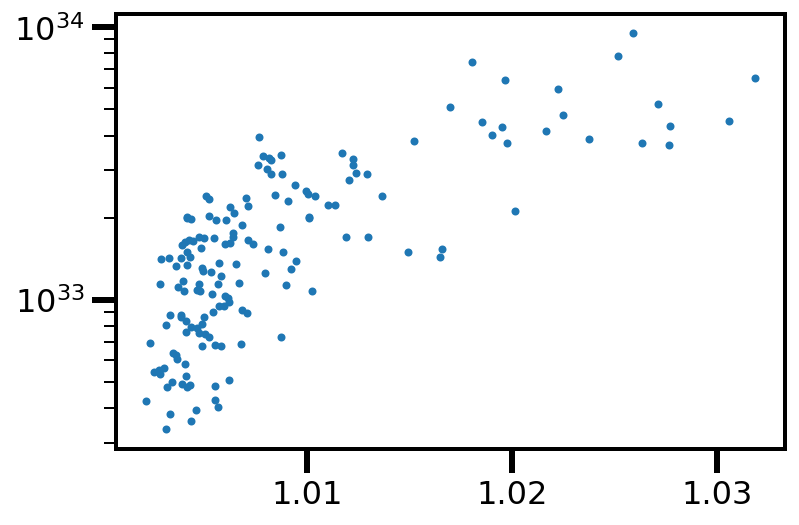

In [154]:
plt.plot(ff.flare_table['amp'][:-6],
         ff.flare_table['ed_s'][:-6]*u.s * lum, '.')
plt.yscale('log')

In [139]:
(1*u.Lsun).to(u.erg/u.s), (0.121*u.Lsun).to(u.erg/u.s)

(<Quantity 3.828e+33 erg / s>, <Quantity 4.63188e+32 erg / s>)